# Imports

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
from src.data_utils import unzip, load_data
from src.preprocess import merge

# Data exploration

### Unzip dataset

In [125]:
unzip()

Successfully extracted to data/interim/


### Load dataset

In [126]:
users_df, items_df, ratings_df = load_data('u.data')

# Print the first few rows of each DataFrame to verify the data loading
print("Users DataFrame:")
print(users_df.head())

print("\nRatings DataFrame:")
ratings_df.head()

Users DataFrame:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Ratings DataFrame:


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [127]:
print("\nItems DataFrame:")
items_df.head()


Items DataFrame:


,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Check null values

In [128]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [129]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [130]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


#### Check duplicates in data

In [131]:
ratings_df[['user_id', 'movie_id']].duplicated().sum()

0

#### Check zip codes variety

In [132]:
sorted(users_df['zip_code'].unique())

['00000',
 '01002',
 '01040',
 '01080',
 '01331',
 '01375',
 '01581',
 '01602',
 '01701',
 '01720',
 '01754',
 '01810',
 '01824',
 '01913',
 '01915',
 '01940',
 '01945',
 '01960',
 '01970',
 '02110',
 '02113',
 '02125',
 '02136',
 '02138',
 '02139',
 '02140',
 '02143',
 '02146',
 '02154',
 '02159',
 '02176',
 '02215',
 '02320',
 '02324',
 '02341',
 '02859',
 '02903',
 '02918',
 '03052',
 '03060',
 '03062',
 '03261',
 '03755',
 '03869',
 '04102',
 '04988',
 '05001',
 '05146',
 '05201',
 '05452',
 '05464',
 '05779',
 '06059',
 '06260',
 '06333',
 '06355',
 '06365',
 '06371',
 '06405',
 '06437',
 '06472',
 '06492',
 '06512',
 '06513',
 '06518',
 '06779',
 '06811',
 '06906',
 '06927',
 '07029',
 '07030',
 '07039',
 '07102',
 '07204',
 '07310',
 '07733',
 '08034',
 '08043',
 '08052',
 '08105',
 '08360',
 '08403',
 '08534',
 '08610',
 '08816',
 '08832',
 '08904',
 '09645',
 '10003',
 '10010',
 '10011',
 '10016',
 '10018',
 '10019',
 '10021',
 '10022',
 '10025',
 '10309',
 '10314',
 '10522',


## Small preprocessing of columns

#### Extract the first symbol from zip_code that states the region

In [133]:
users_df['zip_code'] = users_df['zip_code'].apply(lambda x: x[0])

#### Extract year and month from timestamp

In [134]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] = ratings_df['timestamp'].dt.month
ratings_df['day'] = ratings_df['timestamp'].dt.day

# ratings_df.drop(columns=['timestamp'], inplace=True)

#### Extract number of days from release_date

In [135]:
items_df['release_date'] = pd.to_datetime(items_df['release_date'], format='%d-%b-%Y')
items_df['date'] = (items_df['release_date'].max() - items_df['release_date']).dt.days

## Fill missing values with mean
items_df['days_ago'] = items_df['date'].fillna(items_df['date'].mean())

#### Drop video_release_date, imdb_url

In [136]:
items_df = items_df.drop(columns=['video_release_date', 'imdb_url', 'date'])

### Preprocess title - remove punctation and digits


In [137]:
import re
def preprocess_title(title):
    remove_braces = re.sub(r'\([^)]*\)', '', title)
    if (len(remove_braces) == 0): remove_braces = title
    
    new_title = " ".join(re.findall(r'\b\w{3,}\b', remove_braces.lower())).strip()
    if (len(new_title) == 0): new_title = remove_braces

    return new_title
    

In [138]:
items_df['title'] = items_df['title'].apply(preprocess_title)

## After small preprocessing

In [139]:
print(items_df.columns)
items_df.head()

Index(['movie_id', 'title', 'release_date', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'days_ago'],
      dtype='object')


,movie_id,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,days_ago
0,1,toy story,1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1391.0
1,2,goldeneye,1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1391.0
2,3,four rooms,1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1391.0
3,4,get shorty,1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1391.0
4,5,copycat,1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1391.0


In [140]:
users_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,8
1,2,53,F,other,9
2,3,23,M,writer,3
3,4,24,M,technician,4
4,5,33,F,other,1


In [141]:
ratings_df.head()

,user_id,movie_id,rating,timestamp,year,month,day
0,196,242,3,1997-12-04 15:55:49,1997,12,4
1,186,302,3,1998-04-04 19:22:22,1998,4,4
2,22,377,1,1997-11-07 07:18:36,1997,11,7
3,244,51,2,1997-11-27 05:02:03,1997,11,27
4,166,346,1,1998-02-02 05:33:16,1998,2,2


# Visualization of the data distributions

In [142]:
ratings_df.head()

,user_id,movie_id,rating,timestamp,year,month,day
0,196,242,3,1997-12-04 15:55:49,1997,12,4
1,186,302,3,1998-04-04 19:22:22,1998,4,4
2,22,377,1,1997-11-07 07:18:36,1997,11,7
3,244,51,2,1997-11-27 05:02:03,1997,11,27
4,166,346,1,1998-02-02 05:33:16,1998,2,2


### Vizualize ratings

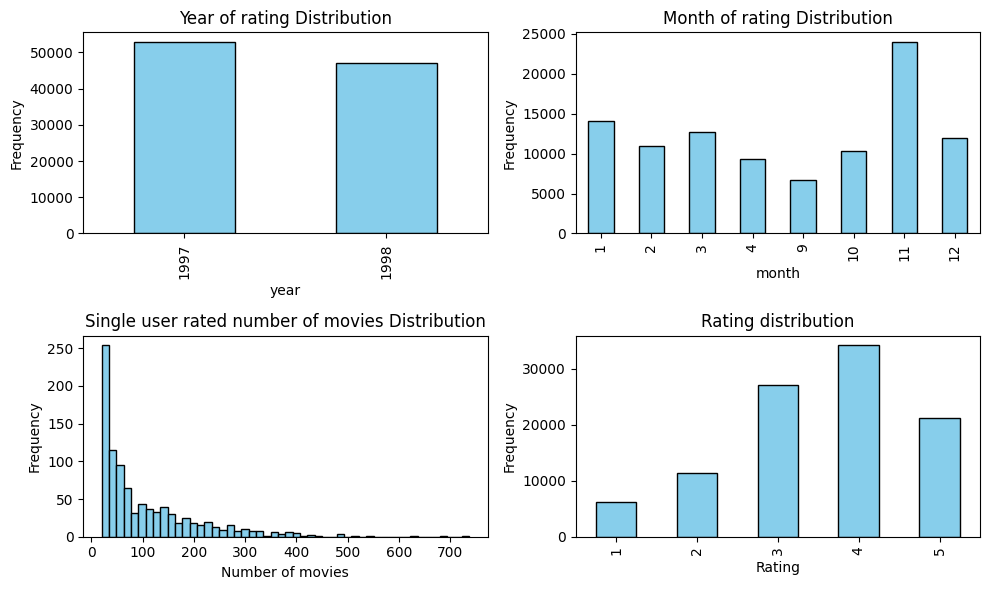

In [143]:
import datetime
df = ratings_df.copy()

def get_year_month(timestamp):
    # Convert the timestamp to a datetime object
    # dt_object = datetime.datetime.utcfromtimestamp(timestamp)

    # Calculate the number of days
    # date = dt_object.date()
    # print(timestamp)
    return timestamp.year, timestamp.month


df['year'] = df['timestamp'].apply(lambda x: get_year_month(x)[0])
df['month'] = df['timestamp'].apply(lambda x: get_year_month(x)[1])

# Visualization of yaer distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
df['year'].value_counts().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Year of rating Distribution')
plt.xlabel('year')
plt.ylabel('Frequency')

# Visualization of month distribution
plt.subplot(2, 2, 2)
df['month'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Month of rating Distribution')
plt.xlabel('month')
plt.ylabel('Frequency')

number_of_rated_movies = []
for _, group in df.groupby(by=['user_id']):
    number_of_rated_movies.append(group.shape[0])
number_of_rated_movies

# Visualize number of rated movies by user
plt.subplot(2, 2, 3)
plt.hist(number_of_rated_movies, bins=50, edgecolor='black', color='skyblue')
plt.title('Single user rated number of movies Distribution')
plt.xlabel('Number of movies')
plt.ylabel('Frequency')

# Visualize rating distribution
plt.subplot(2, 2, 4)
df['rating'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()

# Save the plot
plt.savefig('reports/figures/ratings.png')


### Visualize movies

In [144]:
items_df.head()

,movie_id,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,days_ago
0,1,toy story,1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1391.0
1,2,goldeneye,1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1391.0
2,3,four rooms,1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1391.0
3,4,get shorty,1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1391.0
4,5,copycat,1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1391.0


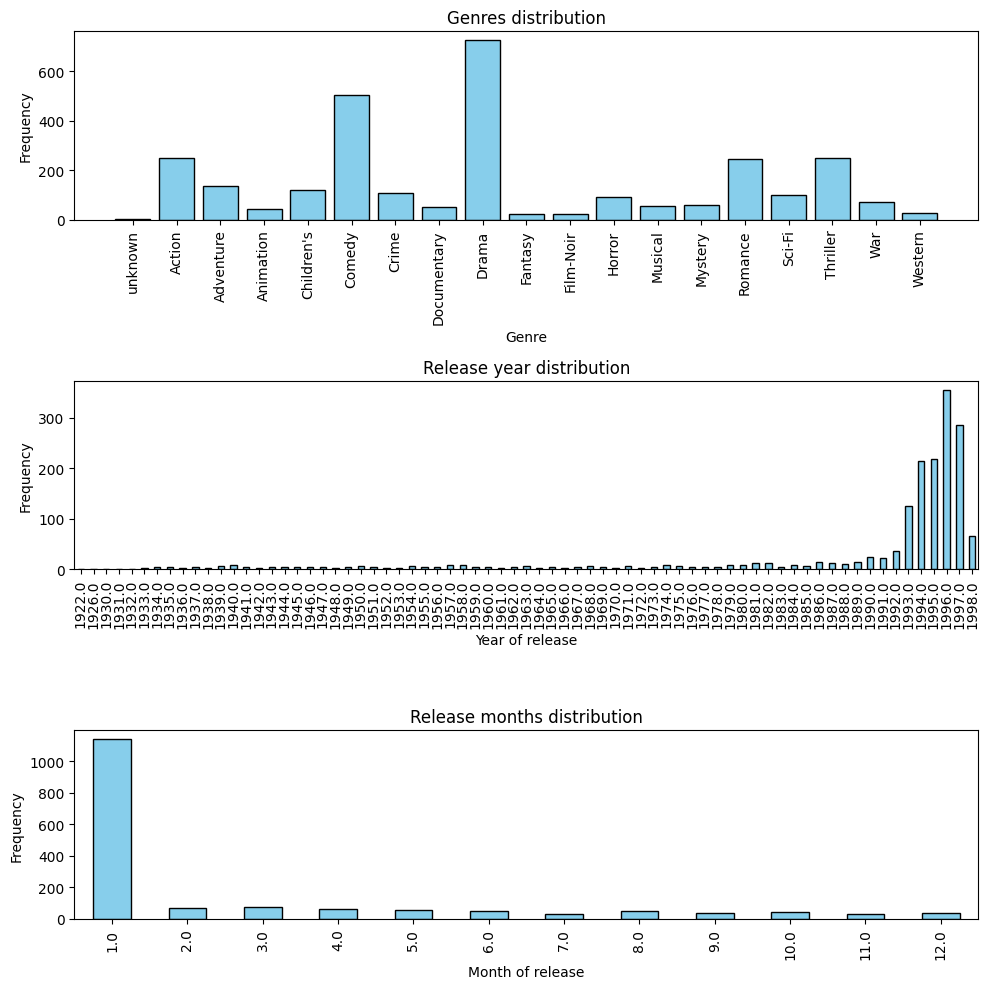

In [145]:
# Visualization of genres distribution
genres_df = items_df.drop(columns=['movie_id', 'title', 'release_date', 'days_ago'])
genres = genres_df.values.sum(axis=0)

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.bar(list(genres_df.columns), list(genres), color='skyblue', edgecolor='black')
plt.title('Genres distribution')
plt.xticks(rotation=90, ha='center')
plt.xlabel('Genre')
plt.ylabel('Frequency')

# Visualization of years of release date
plt.subplot(3, 1, 2)
pd.to_datetime(items_df['release_date'], format='%d-%b-%Y').dt.year.value_counts().sort_index().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Release year distribution')
plt.xlabel('Year of release')
plt.ylabel('Frequency')

# Visualization of months of release date
plt.subplot(3, 1, 3)
pd.to_datetime(items_df['release_date'], format='%d-%b-%Y').dt.month.value_counts().sort_index().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Release months distribution')
plt.xlabel('Month of release')
plt.ylabel('Frequency')

plt.tight_layout()

# Save the plot
plt.savefig('reports/figures/movies.png')


### Visualize users

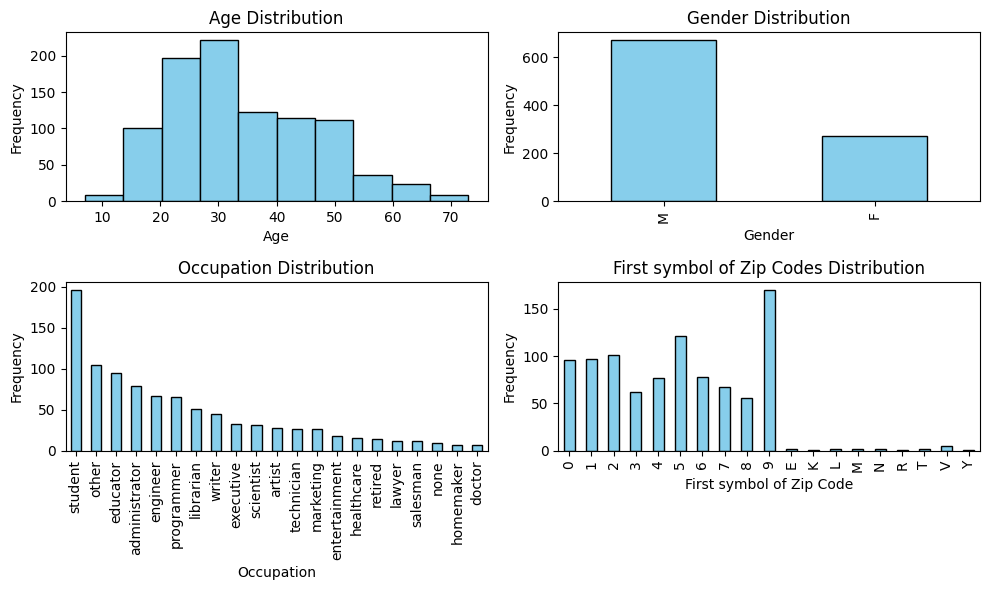

In [146]:
# Visualization of age distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(users_df['age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Visualization of gender distribution
plt.subplot(2, 2, 2)
users_df['gender'].value_counts().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Visualization of occupation distribution
plt.subplot(2, 2, 3)
users_df['occupation'].value_counts().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')

plt.tight_layout()

# Visualization of zip codes distribution
plt.subplot(2, 2, 4)
users_df['zip_code'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('First symbol of Zip Codes Distribution')
plt.xlabel('First symbol of Zip Code')
plt.ylabel('Frequency')

# Save the plot
plt.savefig('reports/figures/users.png')

# Conclusions

- All video release dates are null
- urls are not useful since nobody likes video just looking at url
- zipcodes are quite evenly distributed but there are weird wrong ones that start with E,K,L,M,M,R,T,V,Y
- users are usually student but the mode age is 30. Users are usually men as well.
- users mostly prefer November to watch or rate movies
- dataset is unbalanced towards the good rating (4-5)
- genres are unbalanced towards drama, comedy, actions
- almost all the films were released at January
- the years of release are very widespread but has a huge cluster aroun 1996

# Strong preprocessing - scalling, encoding and tokenization

### Tokenize title and expand a list of tokens into a row

In [147]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tokenized_titles = [word_tokenize(title) for title in items_df['title']]
vectors = Word2Vec(sentences=tokenized_titles, vector_size=50, window=5, min_count=1).wv

def tokenize(title):
    # print(f'[{title}]')
    return vectors[word_tokenize(title)].mean(axis=0)

[nltk_data] Downloading package punkt to /home/anaconda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [148]:
items_df['title'] = items_df['title'].apply(tokenize)

items_df = pd.concat([items_df, items_df['title'].apply(pd.Series)], axis=1)
items_df = items_df.drop(columns=['title'])

### Scaling

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


# Rating - year, month, day, rating
ratings_df['rating'] = scaler.fit_transform(ratings_df[['rating']])
ratings_df['year'] = scaler.fit_transform(ratings_df[['year']])
ratings_df['month'] = scaler.fit_transform(ratings_df[['month']])
ratings_df['day'] = scaler.fit_transform(ratings_df[['day']])

# Users - age
users_df['age'] = scaler.fit_transform(users_df[['age']])

# Movie - released days ago
items_df['days_ago'] = scaler.fit_transform(items_df[['days_ago']])

### One-hot Encoding

In [150]:
# User - gender, occupatin, zipcode

users_df = pd.get_dummies(users_df, columns=['occupation'], prefix='ocp', drop_first=True)
users_df = pd.get_dummies(users_df, columns=['gender'], prefix='gender', drop_first=True)
users_df = pd.get_dummies(users_df, columns=['zip_code'], prefix='zipcode', drop_first=True)

# Result after all the preprocessing

In [151]:
# Rating distribution
ratings_df['rating'].value_counts().sort_values()

rating
0.00     6110
0.25    11370
1.00    21201
0.50    27145
0.75    34174
Name: count, dtype: int64

In [152]:
ratings_df.head()

,user_id,movie_id,rating,timestamp,year,month,day
0,196,242,0.50,1997-12-04 15:55:49,0.0,1.000000,0.100000
1,186,302,0.50,1998-04-04 19:22:22,1.0,0.272727,0.100000
2,22,377,0.00,1997-11-07 07:18:36,0.0,0.909091,0.200000
3,244,51,0.25,1997-11-27 05:02:03,0.0,0.909091,0.866667
4,166,346,0.00,1998-02-02 05:33:16,1.0,0.090909,0.033333


In [153]:
users_df.head()

,user_id,age,ocp_artist,ocp_doctor,ocp_educator,ocp_engineer,ocp_entertainment,ocp_executive,ocp_healthcare,ocp_homemaker,...,zipcode_9,zipcode_E,zipcode_K,zipcode_L,zipcode_M,zipcode_N,zipcode_R,zipcode_T,zipcode_V,zipcode_Y
0,1,0.257576,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,0.696970,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,0.242424,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,0.257576,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0.393939,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Merge into one dataset

In [154]:
users_items = merge(ratings_df, users_df, items_df)
print(list(users_items.columns))
users_items.head()

['user_id', 'movie_id', 'rating', 'timestamp', 'year', 'month', 'day', 'age', 'ocp_artist', 'ocp_doctor', 'ocp_educator', 'ocp_engineer', 'ocp_entertainment', 'ocp_executive', 'ocp_healthcare', 'ocp_homemaker', 'ocp_lawyer', 'ocp_librarian', 'ocp_marketing', 'ocp_none', 'ocp_other', 'ocp_programmer', 'ocp_retired', 'ocp_salesman', 'ocp_scientist', 'ocp_student', 'ocp_technician', 'ocp_writer', 'gender_M', 'zipcode_1', 'zipcode_2', 'zipcode_3', 'zipcode_4', 'zipcode_5', 'zipcode_6', 'zipcode_7', 'zipcode_8', 'zipcode_9', 'zipcode_E', 'zipcode_K', 'zipcode_L', 'zipcode_M', 'zipcode_N', 'zipcode_R', 'zipcode_T', 'zipcode_V', 'zipcode_Y', 'release_date', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'days_ago', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 

,user_id,movie_id,rating,timestamp,year,month,day,age,ocp_artist,ocp_doctor,...,40,41,42,43,44,45,46,47,48,49
0,196,242,0.50,1997-12-04 15:55:49,0.0,1.000000,0.100000,0.636364,False,False,...,-0.011781,-0.001448,0.012002,-0.0089,-0.010015,-0.000837,-0.012694,0.016361,0.003422,0.01643
1,305,242,1.00,1998-02-01 04:37:08,1.0,0.090909,0.000000,0.242424,False,False,...,-0.011781,-0.001448,0.012002,-0.0089,-0.010015,-0.000837,-0.012694,0.016361,0.003422,0.01643
2,6,242,0.75,1997-12-28 00:16:10,0.0,1.000000,0.900000,0.530303,False,False,...,-0.011781,-0.001448,0.012002,-0.0089,-0.010015,-0.000837,-0.012694,0.016361,0.003422,0.01643
3,234,242,0.75,1998-03-27 21:14:21,1.0,0.181818,0.866667,0.803030,False,False,...,-0.011781,-0.001448,0.012002,-0.0089,-0.010015,-0.000837,-0.012694,0.016361,0.003422,0.01643
4,63,242,0.50,1997-10-01 23:06:30,0.0,0.818182,0.000000,0.363636,False,False,...,-0.011781,-0.001448,0.012002,-0.0089,-0.010015,-0.000837,-0.012694,0.016361,0.003422,0.01643
